# Plant Disease Detection - Cleaning and Data Split

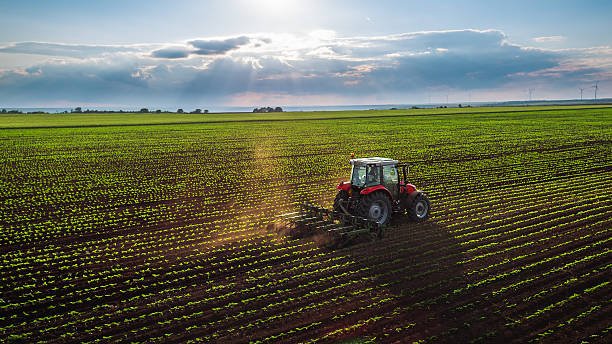

## Approach
Convolutional Neural Network (CNN) methodologies were employed to create an AI approach for detecting diseases in plants through leaf images. The neural network model or architecture was formulated using the Keras API and implemented using Python in conjunction with TensorFlow.


## Dataset and Preprocessing
Cornell University offers a collection of 55,448 images depicting both healthy and infected leaves of crop plants on the PlantVillage online platform. This study introduces and details both the dataset and the platform, titled "An open access repository of images on plant health to enable the development of mobile disease diagnostics.". These data mark the initiation of an ongoing crowdsourcing initiative aimed at leveraging computer vision techniques to address the challenge of crop yield losses caused by infectious diseases. It was promotoed with a [plant disease detection competition](https://https://www.aicrowd.com/challenges/plantvillage-disease-classification-challengez)).

In [ ]:
#imports
import numpy as np
import cv2
from os import listdir
import os, shutil
import math

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
#mount drive in Google Colab (Skip if using local computer)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Copying, checking, and splitting data



In [ ]:
#specify root directory for all images
rootI_dir = "/content/drive/MyDrive/Plants/data/Plant_leave_diseases"

In [ ]:
#function to check if a file is an image
def is_image(filename):
    try:
        with Image.open(filename) as img:
            return True
    except:
        return False

# function to count images in a directory
def count_images_in_directory(directory):
    image_count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_count += 1
    return image_count

In [ ]:
# check all files are there, should be 55,448
total_image_count = count_images_in_directory(root_dir)
print(f"Total number of images in {root_dir}: {total_image_count}")

Total number of images in /content/drive/MyDrive/Plants/data/Plant_leave_diseases: 55448


In [ ]:
#create binary directory for healthy and disease images
plant_path = "/content/drive/MyDrive/Plants/data/plant_data"
os.mkdir(plant_path)

In [ ]:
#create healthy and disease folder
binary_healthy_path = "/content/drive/MyDrive/Plants/data/binary_1/healthy"
os.mkdir(binary_healthy_path)

binary_disease_path = "/content/drive/MyDrive/Plants/data/binary_1/disease"
os.mkdir(binary_disease_path)

In [ ]:
# define the destination directories for healthy and not healthy files
healthy_dir = "/content/drive/MyDrive/Plants/data/binary_1/healthy"
disease_dir = "/content/drive/MyDrive/Plants/data/binary_1/disease"

In [ ]:
#name directories for move
root_dir = "/content/drive/MyDrive/Plants/data/Plant_leave_diseases"
destination_dir = "/content/drive/MyDrive/Plants/data/binary_1"

In [ ]:
# Iterate through subdirectories in the root directory, determine if healthy or disease, move to subdirectory
for subdirectory in os.listdir(root_dir):
    subdirectory_path = os.path.join(root_dir, subdirectory)


    if os.path.isdir(subdirectory_path):
        is_healthy = subdirectory.endswith("healthy")
        destination = healthy_dir if is_healthy else disease_dir
        shutil.move(subdirectory_path, os.path.join(destination, subdirectory))

print("Separated into 'healthy' and 'disease' directories.")

Subdirectories separated into 'healthy' and 'disease' directories.


In [ ]:
# CHECK - Disease and Healthy should sum to 55,448 images

In [ ]:
#disease count
total_disease_count = count_images_in_directory(disease_dir)
print(f"Total number of images in {disease_dir}: {total_disease_count}")

Total number of images in /content/drive/MyDrive/Plants/data/binary_1/disease: 40364


In [ ]:
#disease count
total_healthy_count = count_images_in_directory(healthy_dir)
print(f"Total number of images in {healthy_dir}: {total_healthy_count}")

Total number of images in /content/drive/MyDrive/Plants/data/binary_1/healthy: 15084


In [ ]:
#copy healthy and disease folders to other binary folder

In [ ]:
#copy healthy data

root_dir = "/content/drive/MyDrive/Plants/data/binary_1/healthy"
destination_directory = "/content/drive/MyDrive/Plants/data/binary/healthy"

try:
    for item in os.listdir(root_dir):
        source_item = os.path.join(root_dir, item)
        destination_item = os.path.join(destination_directory, item)
        if os.path.isdir(source_item):
            shutil.copytree(source_item, destination_item)
        else:
            shutil.copy2(source_item, destination_item)
    print(f"Contents of {root_dir} have been copied to {destination_directory}.")
except Exception as e:
    print(f"An error occurred: {e}")

Contents of /content/drive/MyDrive/Plants/data/binary_1/healthy have been copied to /content/drive/MyDrive/Plants/data/binary/healthy.


In [ ]:
#copy disease data

root_dir = "/content/drive/MyDrive/Plants/data/binary_1/disease"
destination_d_directory = "/content/drive/MyDrive/Plants/data/binary/disease"

try:
    for item in os.listdir(root_dir):
        source_item = os.path.join(root_dir, item)
        destination_item = os.path.join(destination_d_directory, item)
        if os.path.isdir(source_item):
            shutil.copytree(source_item, destination_item)
        else:
            shutil.copy2(source_item, destination_item)
    print(f"Contents of {root_dir} have been copied to {destination_d_directory}.")
except Exception as e:
    print(f"An error occurred: {e}")

Contents of /content/drive/MyDrive/Plants/data/binary_1/disease have been copied to /content/drive/MyDrive/Plants/data/binary/disease.


In [ ]:
#CHECK - Should should sum to 55,448

In [ ]:
#healthy count
total_healthy_count = count_images_in_directory(destination_directory)
print(f"Total number of images in {destination_directory}: {total_healthy_count}")

Total number of images in /content/drive/MyDrive/Plants/data/binary/healthy: 15084


In [ ]:
#disease count
total_disease_count = count_images_in_directory(destination_d_directory)
print(f"Total number of images in {destination_d_directory}: {total_disease_count}")

Total number of images in /content/drive/MyDrive/Plants/data/binary/disease: 40364


In [ ]:
#Successfully copied and appears in drive

Images are currently within subfolders related to their species. We must take out the images to use the binary model.

Let's start with the healthy images:

In [ ]:
# fxn to move and rename files to avoid naming conflicts
def move_and_rename(src, dst):
    base, ext = os.path.splitext(dst)
    index = 1
    while os.path.exists(dst):
        dst = f"{base}_{index}{ext}"
        index += 1
    shutil.move(src, dst)

In [ ]:
#go through the subdirectories within the "healthy" directory, check directory and loop through files,
## check name of file (change if needed), copy and add into healthy file, delete OG file

for subdirectory in os.listdir(healthy_dir):
    subdirectory_path = os.path.join(healthy_dir, subdirectory)

    if os.path.isdir(subdirectory_path):
        for item in os.listdir(subdirectory_path):
            item_path = os.path.join(subdirectory_path, item)
            destination_item = os.path.join(healthy_dir, item)
            while os.path.exists(destination_item):
                base_name, extension = os.path.splitext(item)
                item = f"{base_name}_1{extension}"
                destination_item = os.path.join(healthy_dir, item)
            shutil.copy2(item_path, destination_item)
        shutil.rmtree(subdirectory_path)

print("Images from files within 'healthy' extracted, and original files deleted.")

Images from files within 'healthy' extracted, and original files deleted.


In [ ]:
# CHECK - Healthy
total_healthy_count = count_images_in_directory(healthy_dir)
print(f"Total number of images in {healthy_dir}: {total_healthy_count}")

Total number of images in /content/drive/MyDrive/Plants/data/binary_1/healthy: 15084


Do the same for disease:

In [ ]:
#go through the subdirectories within the "disease" directory, check directory and loop through files,
## check name of file (change if needed), copy and add into disease file, delete OG file
for subdirectory in os.listdir(disease_dir):
    subdirectory_path = os.path.join(disease_dir, subdirectory)
    if os.path.isdir(subdirectory_path):
        for item in os.listdir(subdirectory_path):
            item_path = os.path.join(subdirectory_path, item)
            destination_item = os.path.join(disease_dir, item)
            while os.path.exists(destination_item):
                base_name, extension = os.path.splitext(item)
                item = f"{base_name}_1{extension}"
                destination_item = os.path.join(disease_dir, item)
            shutil.copy2(item_path, destination_item)
        shutil.rmtree(subdirectory_path)

print("Images from files within 'disease' extracted, and original files deleted.")

In [ ]:
#CHECK - Disease image count
total_disease_count = count_images_in_directory(disease_dir)
print(f"Total number of images in {disease_dir}: {total_disease_count}")

Total number of images in /content/drive/MyDrive/Plants/data/binary_1/disease: 40364


## Create Train-Test-Val folders of images

In [ ]:
#ttv dataset directory
plant_dir = '/content/drive/MyDrive/Plants/data/plant_split'
os.mkdir(plant_dir)

In [ ]:
#specify root directory for all images
rootII_dir = "/content/drive/MyDrive/Plants/data/binary_1"

In [ ]:
#dir for the training, validation, and test splits
train_dir = os.path.join(plant_dir, 'train')
os.mkdir(train_dir)
val_dir = os.path.join(plant_dir, 'val')
os.mkdir(val_dir)
test_dir = os.path.join(plant_dir, 'test')
os.mkdir(test_dir)

In [ ]:
# list of all plant disease classes in the original dataset
classesII_list = os.listdir(rootII_dir)

In [ ]:
for cls in classesII_list:
    #dir with training pictures
    os.mkdir(os.path.join(train_dir, cls))

    #dir with validation pictures
    os.mkdir(os.path.join(val_dir, cls))

    # dir with test pictures
    os.mkdir(os.path.join(test_dir, cls))

In [ ]:
# copying 80% images of each class to train_dir, 15% to validation, 5% to train
for cls in classesII_list:
    path = os.path.join(rootII_dir, cls) #constructing paths to where data is stored
    fnames = os.listdir(path)
    train_size = math.floor(len(fnames) * 0.8)
    validation_size = math.floor(len(fnames) * 0.15)
    test_size = math.floor(len(fnames) * 0.05)

    train_fnames = fnames[:train_size]
    print("Train size(",cls,"): ", len(train_fnames))
    for fname in train_fnames:
        src = os.path.join(path, fname)
        dst = os.path.join(os.path.join(train_dir, cls), fname)
        shutil.copyfile(src, dst)

    validation_fnames = fnames[train_size:(validation_size + train_size)]
    print("Validation size(",cls,"): ", len(validation_fnames))
    for fname in validation_fnames:
        src = os.path.join(path, fname)
        dst = os.path.join(os.path.join(val_dir, cls), fname)
        shutil.copyfile(src, dst)

    test_fnames = fnames[(train_size+validation_size):(validation_size + train_size +test_size)]
    print("Test size(",cls,"): ", len(test_fnames))
    for fname in test_fnames:
        src = os.path.join(path, fname)
        dst = os.path.join(os.path.join(test_dir, cls), fname)
        shutil.copyfile(src, dst)


Train size( healthy ):  12067
Validation size( healthy ):  2262
Test size( healthy ):  754
Train size( disease ):  32291
Validation size( disease ):  6054
Test size( disease ):  2018


In [ ]:
# should sum to 55448, if yes, we're all set!

### Non-Binary Dataset



In [ ]:
import os
import pickle
from collections import defaultdict

In [ ]:
plant_ds = "/content/drive/MyDrive/PlantDisease/data/rawPlantDat"

#create empty dictionary
dataset = defaultdict(list)

# go through subfolders, where each subfolder is a class
for class_folder in os.listdir(plant_ds):
    class_path = os.path.join(plant_ds, class_folder)
    if os.path.isdir(class_path):
        images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith(".jpg")] #get a list of file names
        dataset[class_folder] = images

# pickle file
pickle_filename = 'plants.pkl'

# Save the dataset dictionary to a pickle file
with open(pickle_filename, 'wb') as file:
    pickle.dump(dict(dataset), file)

print(f'Dataset saved to {pickle_filename}')

Dataset saved to plants.pkl


In [ ]:
source_path = '/content/plants.pkl'  # Replace with the actual filename
destination_folder = '/content/drive/MyDrive/Plant_split'  # Replace with the destination folder

# move
shutil.move(source_path, os.path.join(destination_folder, 'plants.pkl'))

'/content/drive/MyDrive/Plant_split/plants.pkl'

## All done!